# Pre Processing

## Import Packages

In [1391]:
! pip install pandas
! pip install scikit-learn
! pip install seaborn
! pip install matplotlib

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np


## Load Dataset

In [1392]:
df = pd.read_csv('hepatitis.csv')
print("Shape of the dataset:", df.shape)
pd.set_option('display.max_columns', None)

df.head(10)

Shape of the dataset: (155, 21)


,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
5,6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
6,7,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,8,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1,?,?,?,?,1
8,9,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,?,48,4.4,?,1
9,10,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1,?,120,3.9,?,1


In [1393]:
df = df.drop('ID', axis=1)


In [1394]:
df = df.replace('?', np.nan)


In [1395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      155 non-null    int64 
 1   age         155 non-null    int64 
 2   gender      155 non-null    int64 
 3   steroid     154 non-null    object
 4   antivirals  155 non-null    int64 
 5   fatigue     154 non-null    object
 6   malaise     154 non-null    object
 7   anorexia    154 non-null    object
 8   liverBig    145 non-null    object
 9   liverFirm   144 non-null    object
 10  spleen      150 non-null    object
 11  spiders     150 non-null    object
 12  ascites     150 non-null    object
 13  varices     150 non-null    object
 14  bili        149 non-null    object
 15  alk         126 non-null    object
 16  sgot        151 non-null    object
 17  albu        139 non-null    object
 18  protime     88 non-null     object
 19  histology   155 non-null    int64 
dtypes: int64(5

In [1396]:
nulls = df.isna().sum().sum()
print(f"number of null values : {nulls}")

number of null values : 167


In [1397]:
duplicates = df[df.duplicated()]
print(f"number of duplicated rows : {len(duplicates)}")

number of duplicated rows : 0


In [1398]:
df.shape

(155, 20)

## Target Mapping  1 ---> 0 means Alive & 2 ---> 1 means Dead
Beacuse data is medical and we want to predict dead = true positive

In [1399]:
# 1 : Dead
# 2: Alive
df['target'].replace({2: 0, 1: 1}, inplace=True)

In [1400]:
df.head(10)

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,0,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,NaN,1
1,0,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,NaN,1
2,0,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,NaN,1
3,0,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,0,34,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,200,4,NaN,1
5,0,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,NaN,NaN,NaN,NaN,NaN,1
7,0,23,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,NaN,NaN,NaN,1
8,0,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,NaN,48,4.4,NaN,1
9,0,30,1,2,2,2,2,2,2,2,2,2,2,2,1,NaN,120,3.9,NaN,1


In [1401]:
df['target'].value_counts()

0    123
1     32
Name: target, dtype: int64

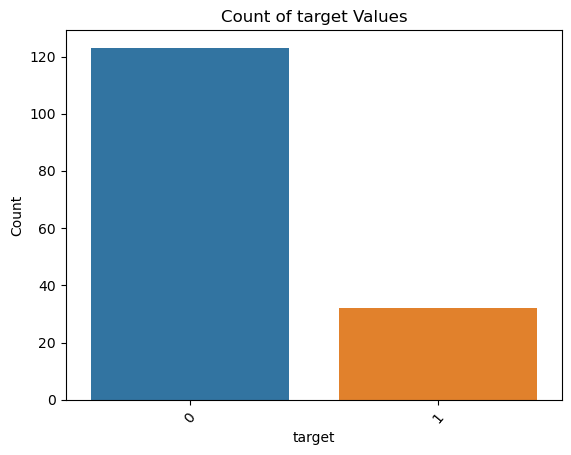

In [1402]:
sns.countplot(x='target', data=df)
plt.title(f'Count of target Values')
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


## Age

In [1403]:
df['age'].value_counts()

30    8
34    8
38    8
36    7
51    6
39    6
50    6
42    5
54    5
45    5
44    5
28    5
37    5
32    4
47    4
27    4
31    4
23    4
41    3
56    3
33    3
52    3
20    3
40    3
61    3
25    3
49    3
35    2
22    2
48    2
57    2
24    2
58    2
62    2
78    1
53    1
46    1
70    1
72    1
69    1
7     1
65    1
64    1
60    1
59    1
67    1
26    1
66    1
43    1
Name: age, dtype: int64

In [1404]:
df['age'].describe()

count    155.000000
mean      41.200000
std       12.565878
min        7.000000
25%       32.000000
50%       39.000000
75%       50.000000
max       78.000000
Name: age, dtype: float64

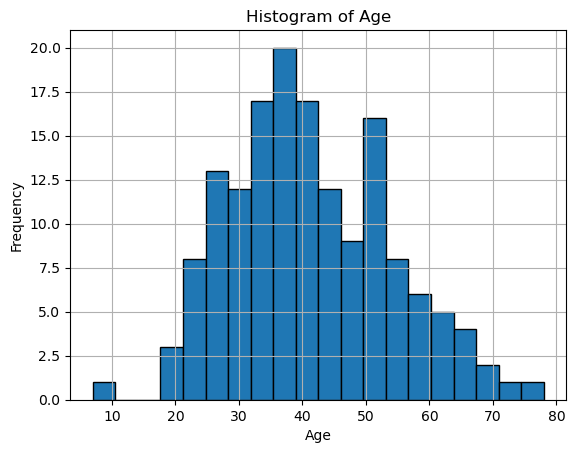

In [1405]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

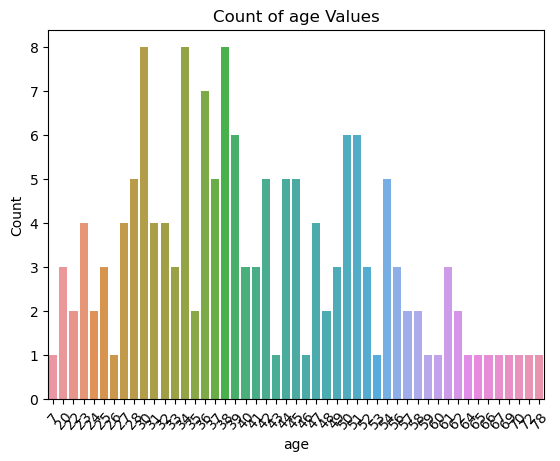

In [1406]:
sns.countplot(x='age', data=df)
plt.title(f'Count of age Values')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


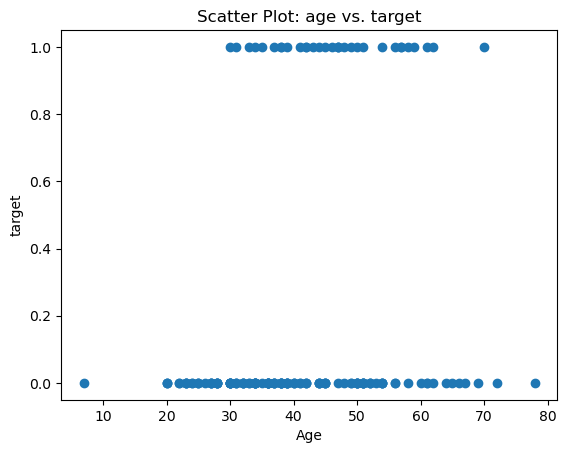

In [1407]:
# scatter plot vs target
plt.scatter(df['age'], df['target'])
plt.xlabel('Age')
plt.ylabel('target')
plt.title('Scatter Plot: age vs. target')
plt.show()

## gender

In [1408]:
df['gender'].value_counts()

1    139
2     16
Name: gender, dtype: int64

In [1409]:
df['gender'].describe()

count    155.000000
mean       1.103226
std        0.305240
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: gender, dtype: float64

In [1410]:
df['gender_binary'] = df['gender'].map({1:1, 2:0})
df.groupby('gender_binary')['target'].mean()

gender_binary
0    0.000000
1    0.230216
Name: target, dtype: float64

In [1411]:
df.drop('gender_binary', axis=1, inplace=True)


In [1412]:
# 1 : Man
# 2: Woman
df['gender'].replace({2: 0, 1: 1}, inplace=True)


In [1413]:
df['gender'].value_counts()

1    139
0     16
Name: gender, dtype: int64

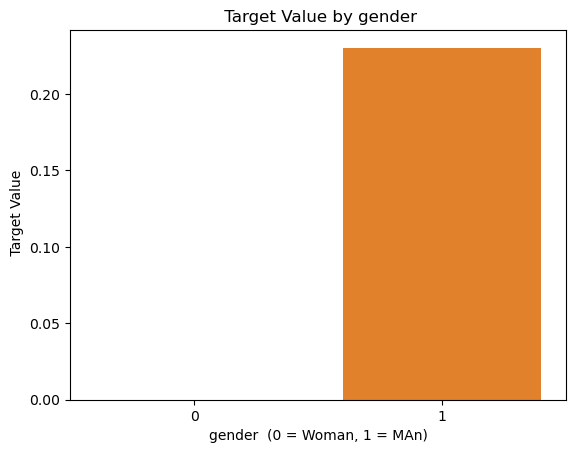

In [1414]:
sns.barplot(x='gender', y='target', data=df, ci=None)
plt.title(' Target Value by gender')
plt.xlabel('gender  (0 = Woman, 1 = MAn)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


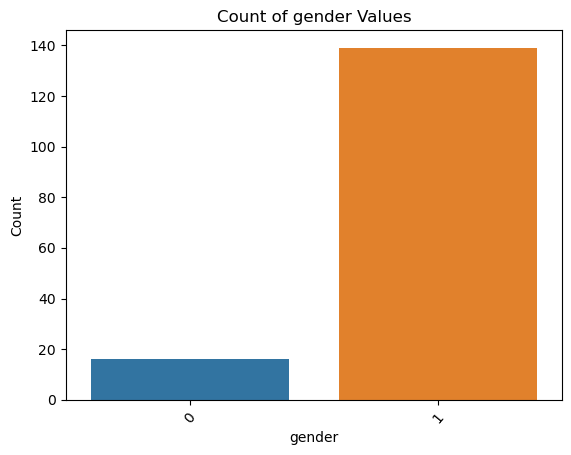

In [1415]:
sns.countplot(x='gender', data=df)
plt.title(f'Count of gender Values')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


## steroid

In [1416]:
df['steroid'].value_counts()

2    78
1    76
Name: steroid, dtype: int64

In [1417]:
df['steroid'].describe()

count     154
unique      2
top         2
freq       78
Name: steroid, dtype: object

In [1418]:
df['steroid'] = pd.to_numeric(df['steroid'], errors='coerce')


In [1419]:
df['steroid_binary'] = df['steroid'].map({1:'used', 2:'not used'})
df.groupby('steroid_binary')['target'].mean()

steroid_binary
not used    0.153846
used        0.263158
Name: target, dtype: float64

In [1420]:
df.drop('steroid_binary', axis=1, inplace=True)


In [1421]:
df['gender'].replace({2: 0, 1: 1}, inplace=True)

In [1422]:
print(df['steroid'].unique())
print(df['steroid'].dtype)


[ 1.  2. nan]
float64


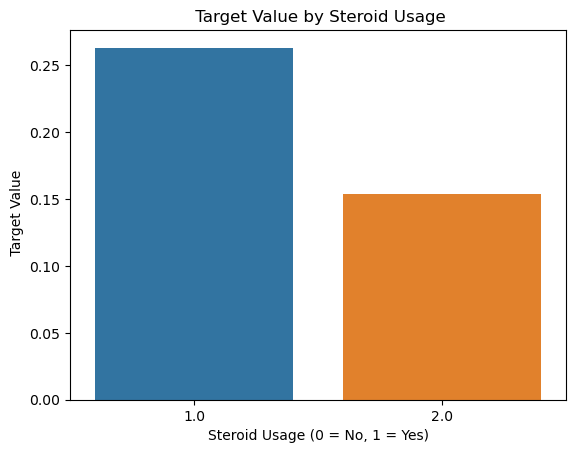

In [1423]:
sns.barplot(x='steroid', y='target', data=df, ci=None)
plt.title(' Target Value by Steroid Usage')
plt.xlabel('Steroid Usage (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


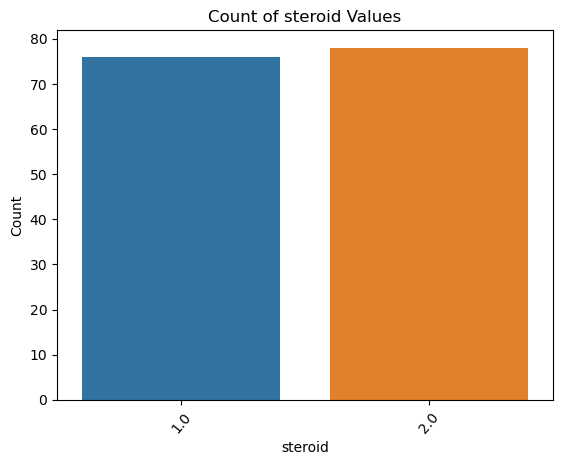

In [1424]:
sns.countplot(x='steroid', data=df)
plt.title(f'Count of steroid Values')
plt.xlabel('steroid')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


## antivirals

In [1425]:
df['antivirals'].value_counts()

2    131
1     24
Name: antivirals, dtype: int64

In [1426]:
df['antivirals'].describe()

count    155.000000
mean       1.845161
std        0.362923
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: antivirals, dtype: float64

In [1427]:
df['antivirals_binary'] = df['antivirals'].map({1:'used', 2:'not used'})
df.groupby('antivirals_binary')['target'].mean()

antivirals_binary
not used    0.229008
used        0.083333
Name: target, dtype: float64

In [1428]:
df.drop('antivirals_binary', axis=1, inplace=True)


In [1429]:
# df['antivirals'] = pd.to_numeric(df['antivirals'], errors='coerce')
# df['antivirals'] = (df['antivirals'] == 2.0).astype(int)
df['antivirals'].replace({2: 1, 1: 0}, inplace=True)

In [1430]:
print(df['antivirals'].unique())
print(df['antivirals'].dtype)


[1 0]
int64


In [1431]:
df['antivirals'].value_counts()

1    131
0     24
Name: antivirals, dtype: int64

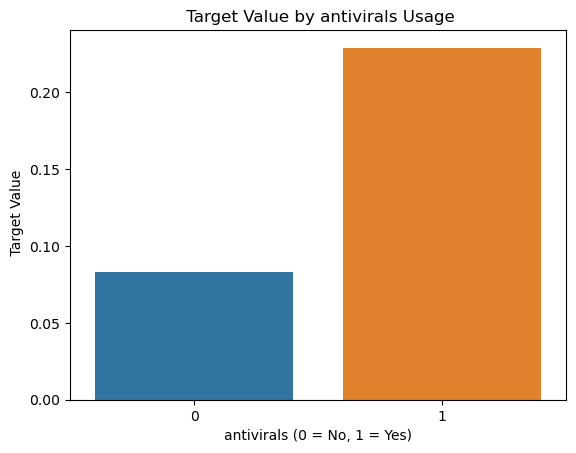

In [1432]:
sns.barplot(x='antivirals', y='target', data=df, ci=None)
plt.title(' Target Value by antivirals Usage')
plt.xlabel('antivirals (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


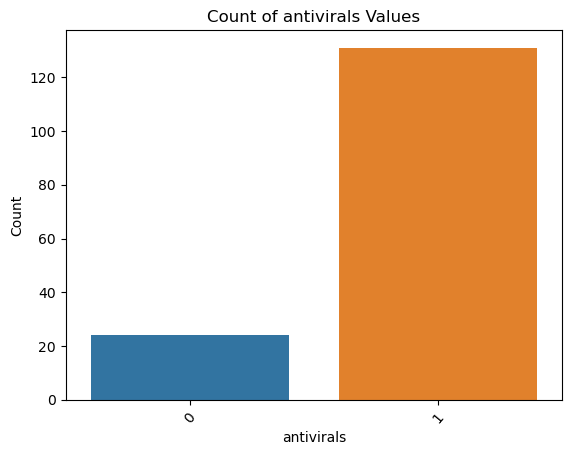

In [1433]:
sns.countplot(x='antivirals', data=df)
plt.title(f'Count of antivirals Values')
plt.xlabel('antivirals')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


## fatique

In [1434]:
df['fatigue'].value_counts()

1    100
2     54
Name: fatigue, dtype: int64

In [1435]:
df['fatigue'].describe()

count     154
unique      2
top         1
freq      100
Name: fatigue, dtype: object

In [1436]:
df['fatigue'] = pd.to_numeric(df['fatigue'], errors='coerce')


In [1437]:

df['fatigue_binary'] = df['fatigue'].map({1:'used', 2:'not used'})
df.groupby('fatigue_binary')['target'].mean()

fatigue_binary
not used    0.037037
used        0.300000
Name: target, dtype: float64

In [1438]:
df.drop('fatigue_binary', axis=1, inplace=True)


In [1439]:
df['fatigue'].replace({2: 0, 1: 1}, inplace=True)

In [1440]:
df['fatigue'].value_counts()

1.0    100
0.0     54
Name: fatigue, dtype: int64

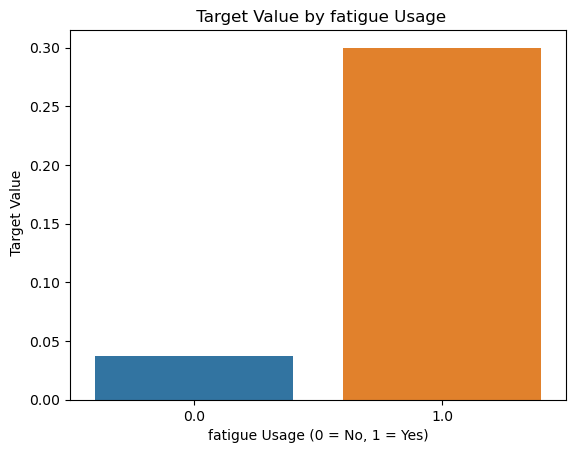

In [1441]:
sns.barplot(x='fatigue', y='target', data=df, ci=None)
plt.title(' Target Value by fatigue Usage')
plt.xlabel('fatigue Usage (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


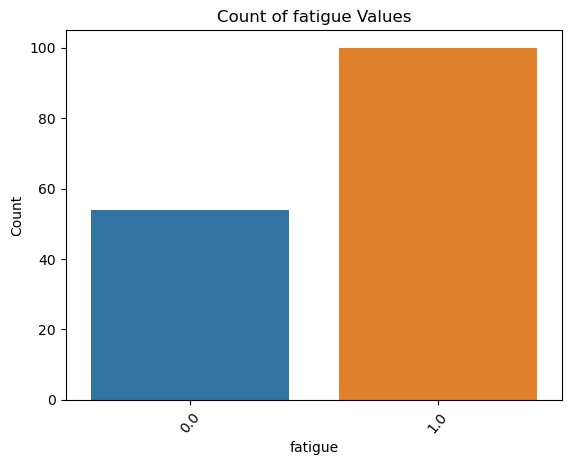

In [1442]:
sns.countplot(x='fatigue', data=df)
plt.title(f'Count of fatigue Values')
plt.xlabel('fatigue')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


## malaise

In [1443]:
df['malaise'].value_counts()

2    93
1    61
Name: malaise, dtype: int64

In [1444]:
df['malaise'].describe()

count     154
unique      2
top         2
freq       93
Name: malaise, dtype: object

In [1445]:
df['malaise'] = pd.to_numeric(df['malaise'], errors='coerce')


In [1446]:

df['malaise_binary'] = df['malaise'].map({1:'used', 2:'not used'})
df.groupby('malaise_binary')['target'].mean()

malaise_binary
not used    0.096774
used        0.377049
Name: target, dtype: float64

In [1447]:
df.drop('malaise_binary', axis=1, inplace=True)


In [1448]:
# df['malaise'] = pd.to_numeric(df['malaise'], errors='coerce')
# df['malaise'] = (df['malaise'] == 2.0).astype(int)
df['malaise'].replace({2: 0, 1: 1}, inplace=True)

In [1449]:
df['malaise'].value_counts()

0.0    93
1.0    61
Name: malaise, dtype: int64

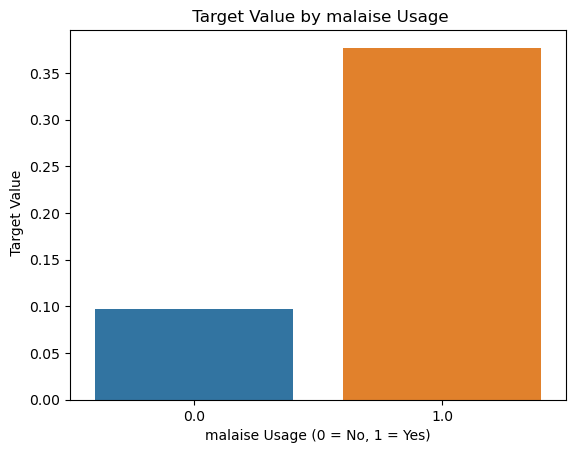

In [1450]:
sns.barplot(x='malaise', y='target', data=df, ci=None)
plt.title(' Target Value by malaise Usage')
plt.xlabel('malaise Usage (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


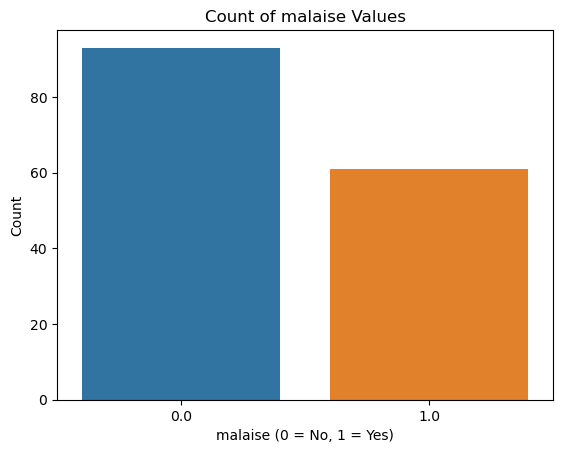

In [1451]:
sns.countplot(x='malaise', data=df)
plt.title('Count of malaise Values')
plt.xlabel('malaise (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## anorexia

In [1452]:
df['anorexia'].value_counts()

2    122
1     32
Name: anorexia, dtype: int64

In [1453]:
df['anorexia'].describe()

count     154
unique      2
top         2
freq      122
Name: anorexia, dtype: object

In [1454]:
df['anorexia'] = pd.to_numeric(df['anorexia'], errors='coerce')


In [1455]:
# df['anorexia'] = pd.to_numeric(df['anorexia'], errors='coerce')
# df['anorexia'] = (df['anorexia'] == 2.0).astype(int)

df['anorexia_binary'] = df['anorexia'].map({1:'used', 2:'not used'})
df.groupby('anorexia_binary')['target'].mean()

anorexia_binary
not used    0.180328
used        0.312500
Name: target, dtype: float64

In [1456]:
df.drop('anorexia_binary', axis=1, inplace=True)


In [1457]:
df['anorexia'].replace({2: 0, 1: 1}, inplace=True)

In [1458]:
df['anorexia'].value_counts()

0.0    122
1.0     32
Name: anorexia, dtype: int64

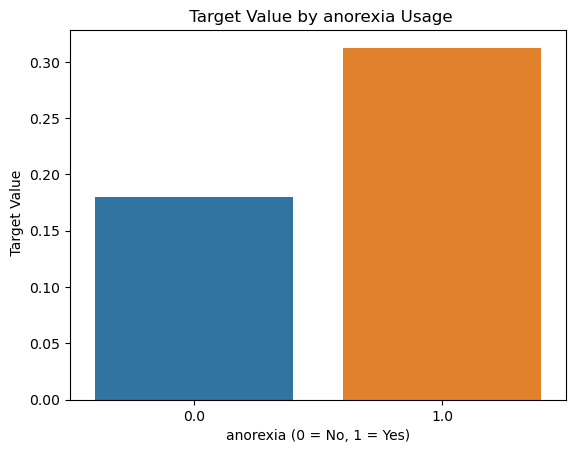

In [1459]:
sns.barplot(x='anorexia', y='target', data=df, ci=None)
plt.title(' Target Value by anorexia Usage')
plt.xlabel('anorexia (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


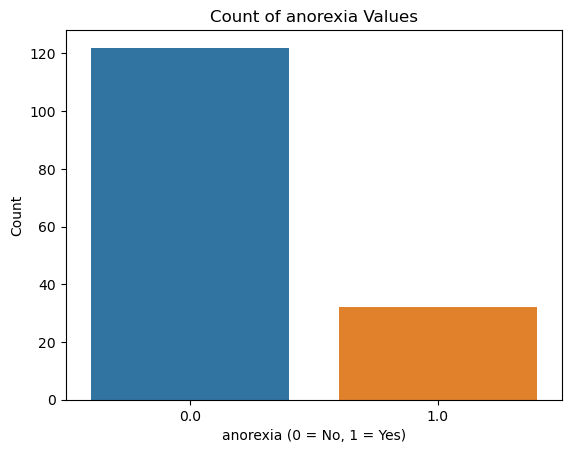

In [1460]:
sns.countplot(x='anorexia', data=df)
plt.title('Count of anorexia Values')
plt.xlabel('anorexia (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## liverBig

In [1461]:
df['liverBig'].value_counts()

2    120
1     25
Name: liverBig, dtype: int64

In [1462]:
df['liverBig'].describe()

count     145
unique      2
top         2
freq      120
Name: liverBig, dtype: object

In [1463]:
df['liverBig'] = pd.to_numeric(df['liverBig'], errors='coerce')


In [1464]:
df['liverBig_binary'] = df['liverBig'].map({1:'used', 2:'not used'})
df.groupby('liverBig_binary')['target'].mean()

liverBig_binary
not used    0.20
used        0.12
Name: target, dtype: float64

In [1465]:
df.drop('liverBig_binary', axis=1, inplace=True)


In [1466]:
# df['liverBig'] = pd.to_numeric(df['liverBig'], errors='coerce')
# df['liverBig'] = (df['liverBig'] == 2.0).astype(int)
df['liverBig'].replace({2: 1, 1: 0}, inplace=True)

In [1467]:
df['liverBig'].value_counts()

1.0    120
0.0     25
Name: liverBig, dtype: int64

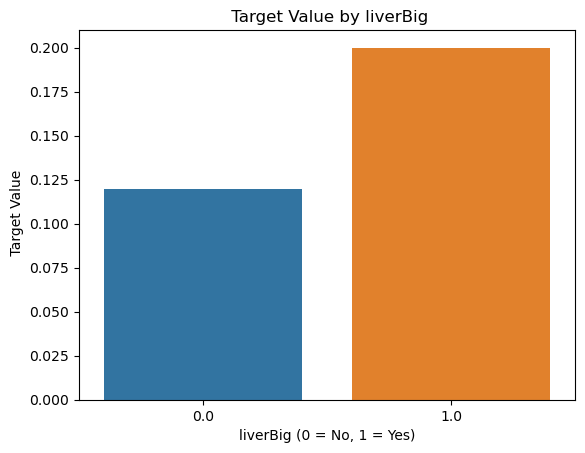

In [1468]:
sns.barplot(x='liverBig', y='target', data=df, ci=None)
plt.title(' Target Value by liverBig')
plt.xlabel('liverBig (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


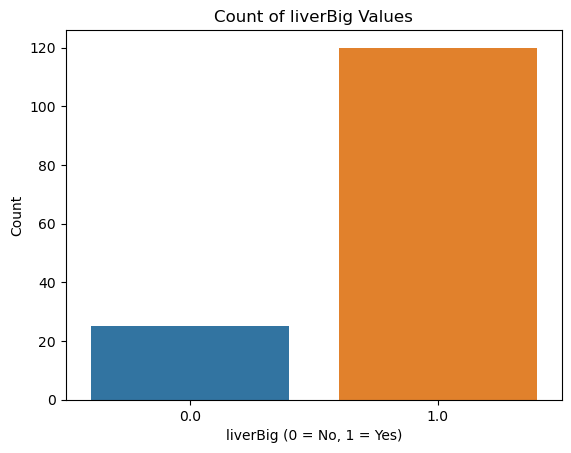

In [1469]:
sns.countplot(x='liverBig', data=df)
plt.title('Count of liverBig Values')
plt.xlabel('liverBig (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## liverFirm

In [1470]:
df['liverFirm'].value_counts()

2    84
1    60
Name: liverFirm, dtype: int64

In [1471]:
df['liverFirm'].describe()

count     144
unique      2
top         2
freq       84
Name: liverFirm, dtype: object

In [1472]:
df['liverFirm'] = pd.to_numeric(df['liverFirm'], errors='coerce')

In [1473]:
df['liverFirm_binary'] = df['liverFirm'].map({1:'used', 2:'not used'})
df.groupby('liverFirm_binary')['target'].mean()

liverFirm_binary
not used    0.166667
used        0.216667
Name: target, dtype: float64

In [1474]:
df.drop('liverFirm_binary', axis=1, inplace=True)


In [1475]:
# df['liverFirm'] = pd.to_numeric(df['liverFirm'], errors='coerce')
# df['liverFirm'] = (df['liverFirm'] == 2.0).astype(int)
df['liverFirm'].replace({2: 0, 1: 1}, inplace=True)

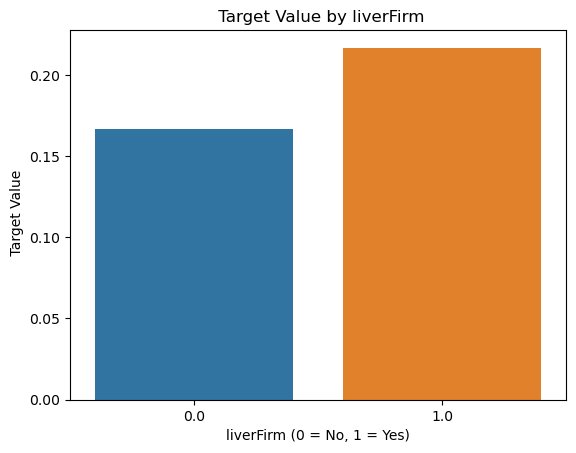

In [1476]:
sns.barplot(x='liverFirm', y='target', data=df, ci=None)
plt.title(' Target Value by liverFirm')
plt.xlabel('liverFirm (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


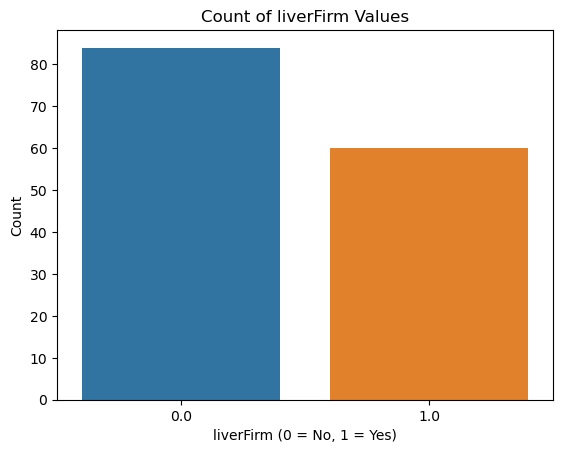

In [1477]:
sns.countplot(x='liverFirm', data=df)
plt.title('Count of liverFirm Values')
plt.xlabel('liverFirm (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## spleen

In [1478]:
df['spleen'].value_counts()

2    120
1     30
Name: spleen, dtype: int64

In [1479]:
df['spleen'].describe()

count     150
unique      2
top         2
freq      120
Name: spleen, dtype: object

In [1480]:
df['spleen'] = pd.to_numeric(df['spleen'], errors='coerce')

In [1481]:
df['spleen_binary'] = df['spleen'].map({1:'used', 2:'not used'})
df.groupby('spleen_binary')['target'].mean()

spleen_binary
not used    0.158333
used        0.400000
Name: target, dtype: float64

In [1482]:
df.drop('spleen_binary', axis=1, inplace=True)


In [1483]:
# df['spleen'] = pd.to_numeric(df['spleen'], errors='coerce')
# df['spleen'] = (df['spleen'] == 2.0).astype(int)
df['spleen'].replace({2: 0, 1: 1}, inplace=True)

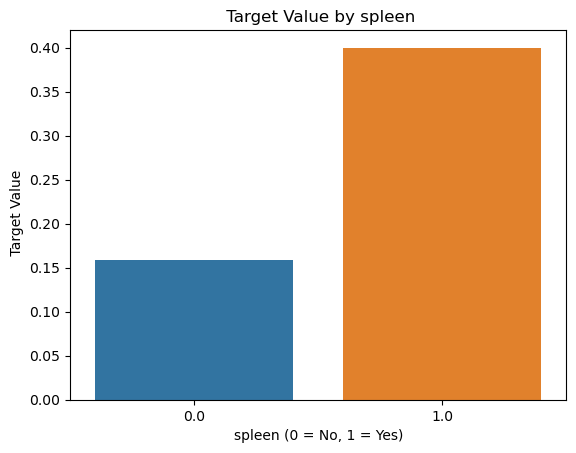

In [1484]:
sns.barplot(x='spleen', y='target', data=df, ci=None)
plt.title(' Target Value by spleen')
plt.xlabel('spleen (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


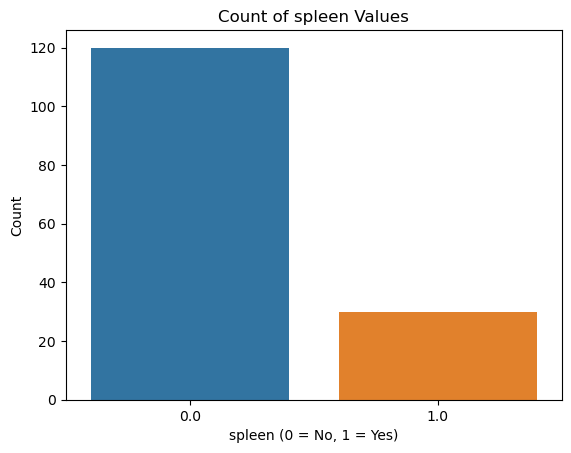

In [1485]:
sns.countplot(x='spleen', data=df)
plt.title('Count of spleen Values')
plt.xlabel('spleen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## spiders

In [1486]:
df['spiders'].value_counts()

2    99
1    51
Name: spiders, dtype: int64

In [1487]:
df['spiders'].describe()

count     150
unique      2
top         2
freq       99
Name: spiders, dtype: object

In [1488]:
df['spiders'] = pd.to_numeric(df['spiders'], errors='coerce')

In [1489]:
df['spiders_binary'] = df['spiders'].map({1:'used', 2:'not used'})
df.groupby('spiders_binary')['target'].mean()

spiders_binary
not used    0.090909
used        0.431373
Name: target, dtype: float64

In [1490]:
df.drop('spiders_binary', axis=1, inplace=True)


In [1491]:
# df['spiders'] = pd.to_numeric(df['spiders'], errors='coerce')
# df['spiders'] = (df['spiders'] == 2.0).astype(int)
df['spleen'].replace({2: 0, 1: 1}, inplace=True)

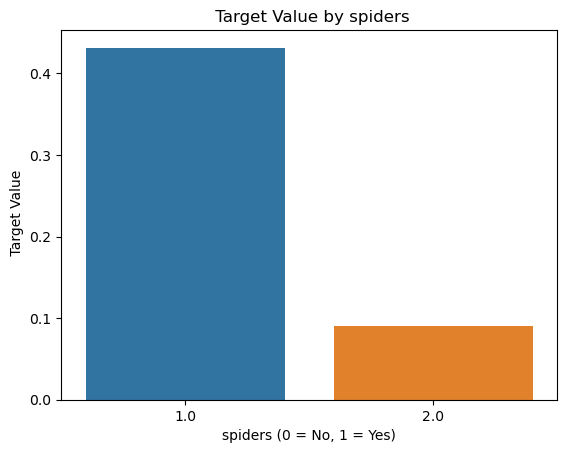

In [1492]:
sns.barplot(x='spiders', y='target', data=df, ci=None)
plt.title(' Target Value by spiders')
plt.xlabel('spiders (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


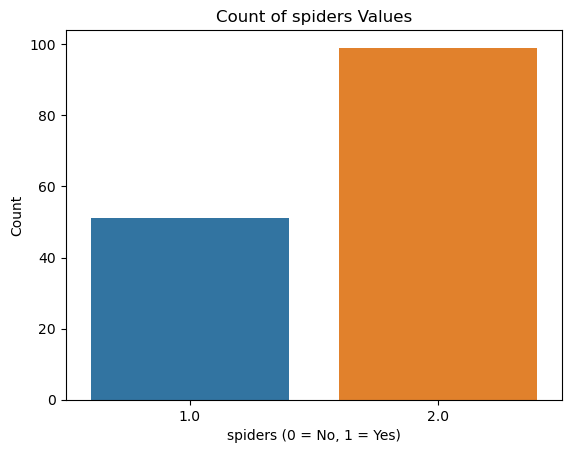

In [1493]:
sns.countplot(x='spiders', data=df)
plt.title('Count of spiders Values')
plt.xlabel('spiders (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## ascites

In [1494]:
df['ascites'].value_counts()

2    130
1     20
Name: ascites, dtype: int64

In [1495]:
df['ascites'].describe()

count     150
unique      2
top         2
freq      130
Name: ascites, dtype: object

In [1496]:
df['ascites'] = pd.to_numeric(df['ascites'], errors='coerce')


In [1497]:
df['ascites_binary'] = df['ascites'].map({1:'used', 2:'not used'})
df.groupby('ascites_binary')['target'].mean()

ascites_binary
not used    0.130769
used        0.700000
Name: target, dtype: float64

In [1498]:
df.drop('ascites_binary', axis=1, inplace=True)


In [1499]:
# df['ascites'] = pd.to_numeric(df['ascites'], errors='coerce')
# df['ascites'] = (df['ascites'] == 2.0).astype(int)
df['ascites'].replace({2: 0, 1: 1}, inplace=True)

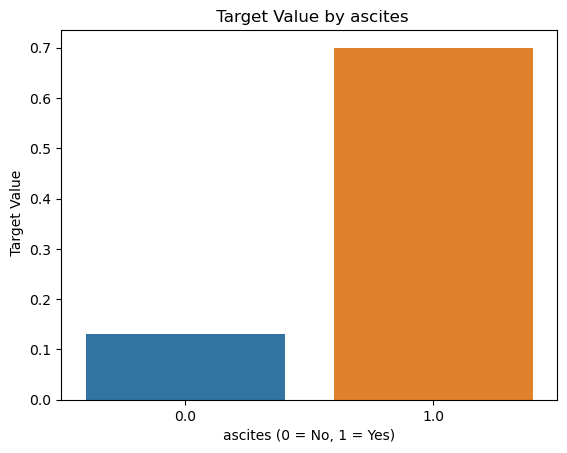

In [1500]:
sns.barplot(x='ascites', y='target', data=df, ci=None)
plt.title(' Target Value by ascites')
plt.xlabel('ascites (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


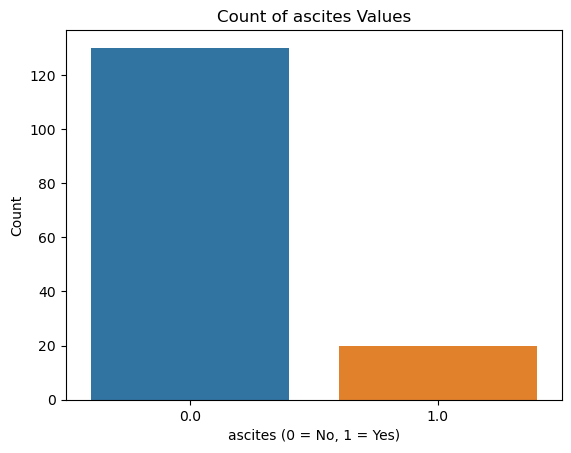

In [1501]:
sns.countplot(x='ascites', data=df)
plt.title('Count of ascites Values')
plt.xlabel('ascites (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## varices

In [1502]:
col = 'varices'

In [1503]:
df[col].value_counts()

2    132
1     18
Name: varices, dtype: int64

In [1504]:
df[col].describe()

count     150
unique      2
top         2
freq      132
Name: varices, dtype: object

In [1505]:
df[col] = pd.to_numeric(df[col], errors='coerce')


In [1506]:
df[f'{col}_binary'] = df[col].map({1:'used', 2:'not used'})
df.groupby(f'{col}_binary')['target'].mean()

varices_binary
not used    0.151515
used        0.611111
Name: target, dtype: float64

In [1507]:
df.drop(f'{col}_binary', axis=1, inplace=True)


In [1508]:
# df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)

In [1509]:
df[col].replace({2: 0, 1: 1}, inplace=True)

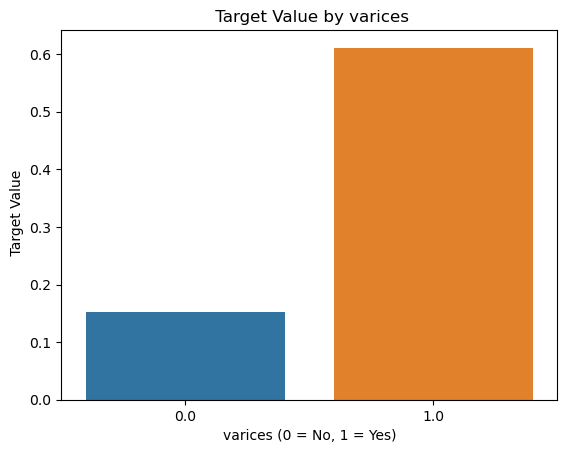

In [1510]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f' Target Value by {col}')
plt.xlabel(f'{col} (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


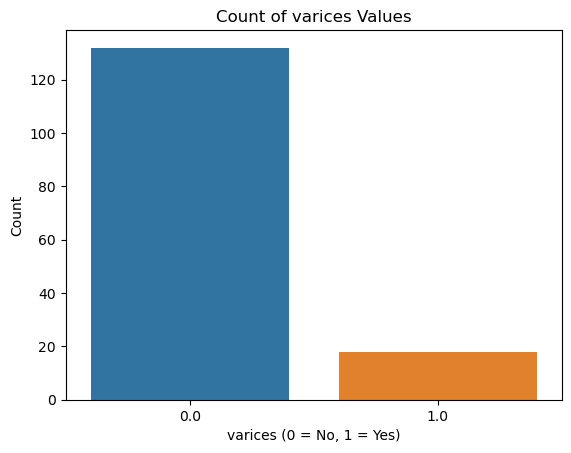

In [1511]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col} (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## histology

In [1512]:
col = 'histology'

In [1513]:
df[col].value_counts()

1    85
2    70
Name: histology, dtype: int64

In [1514]:
df[col].describe()

count    155.000000
mean       1.451613
std        0.499266
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: histology, dtype: float64

In [1515]:
df[f'{col}_binary'] = df[col].map({1:'used', 2:'not used'})
df.groupby(f'{col}_binary')['target'].mean()

histology_binary
not used    0.357143
used        0.082353
Name: target, dtype: float64

In [1516]:
df.drop(f'{col}_binary', axis=1, inplace=True)


In [1517]:
# df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)
df[col].replace({2: 1, 1: 0}, inplace=True)

In [1518]:
df[col].value_counts()

0    85
1    70
Name: histology, dtype: int64

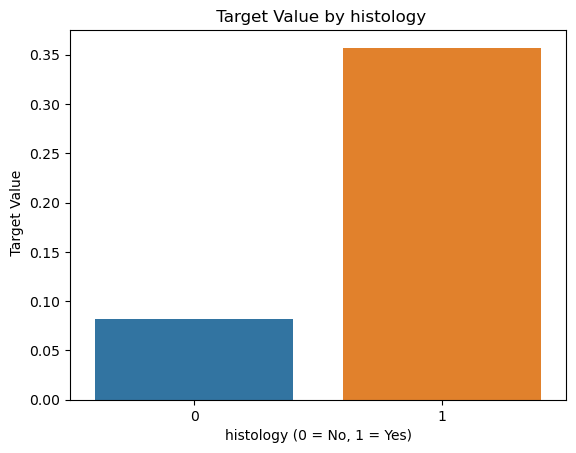

In [1519]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f' Target Value by {col}')
plt.xlabel(f'{col} (0 = No, 1 = Yes)')
plt.ylabel(' Target Value')
plt.xticks(rotation=0)
plt.show()


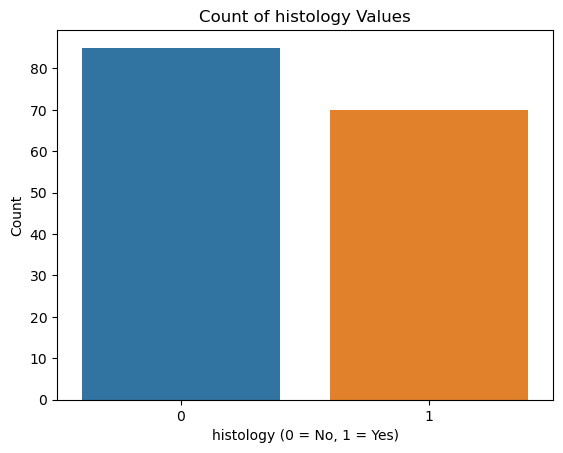

In [1520]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col} (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## bili

In [1521]:
col = 'bili'

In [1522]:
df[col].value_counts()

1      29
0.7    23
0.9    13
0.6    10
0.8    10
1.2     8
1.5     7
1.3     6
2       4
4.6     4
2.3     3
1.7     3
1.6     3
3.2     2
2.8     2
0.5     2
1.4     2
0.4     2
8       1
3.9     1
1.9     1
2.9     1
4.2     1
1.1     1
4.1     1
2.4     1
4.8     1
3       1
2.5     1
3.5     1
1.8     1
0.3     1
2.2     1
7.6     1
Name: bili, dtype: int64

In [1523]:
df[col].describe()

count     149
unique     34
top         1
freq       29
Name: bili, dtype: object

In [1524]:
df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)


In [1525]:
# df[f'{col}_binary'] = df[col].map({1:'used', 2:'not used'})
# df.groupby(f'{col}_binary')['target'].mean()

In [1526]:
# df[col].replace({2: 1, 1: 0}, inplace=True)

In [1527]:
df[col].head()

0    1.0
1    0.9
2    0.7
3    0.7
4    1.0
Name: bili, dtype: float64

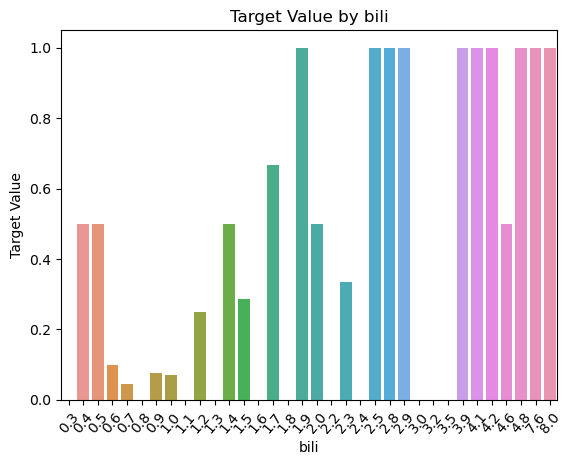

In [1528]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f'Target Value by {col}')
plt.xlabel(f'{col}')
plt.ylabel('Target Value')
plt.xticks(rotation=50)
plt.show()


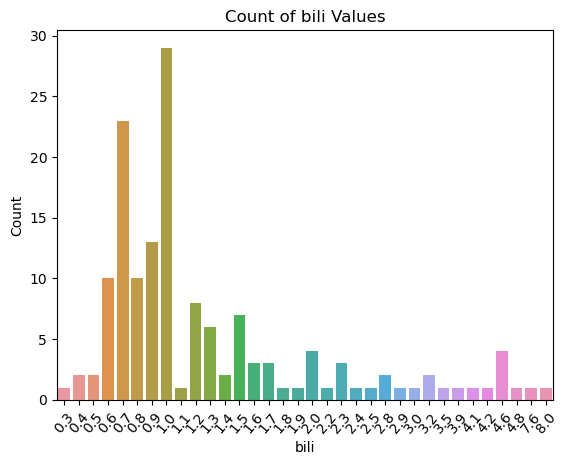

In [1529]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


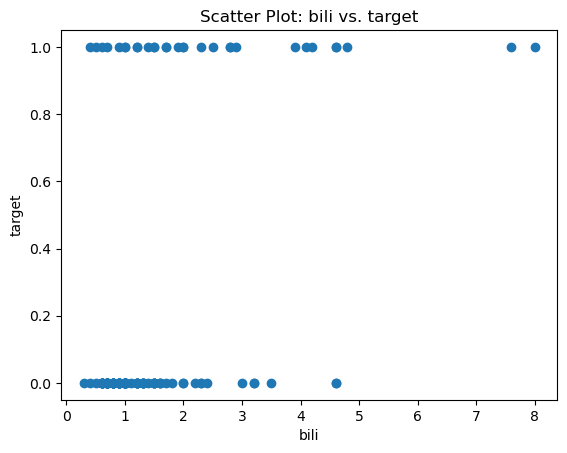

In [1530]:
# scatter plot vs target
plt.scatter(df['bili'], df['target'])
plt.xlabel('bili')
plt.ylabel('target')
plt.title('Scatter Plot: bili vs. target')
plt.show()

## alk

In [1531]:
col = 'alk'

In [1532]:
df[col].value_counts()

85     18
81      4
62      4
100     3
78      3
       ..
103     1
34      1
127     1
55      1
126     1
Name: alk, Length: 83, dtype: int64

In [1533]:
df[col].describe()

count     126
unique     83
top        85
freq       18
Name: alk, dtype: object

In [1534]:
df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)
# df[col] = df[col].astype(int)


In [1535]:
df[col].describe()

count    126.000000
mean     105.325397
std       51.508109
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      295.000000
Name: alk, dtype: float64

In [1536]:
print(df[col].dtype)


float64


In [1537]:
# df[f'{col}_binary'] = df[col].map({1:'used', 2:'not used'})
# df.groupby(f'{col}_binary')['target'].mean()

In [1538]:
# df[col].replace({2: 1, 1: 0}, inplace=True)

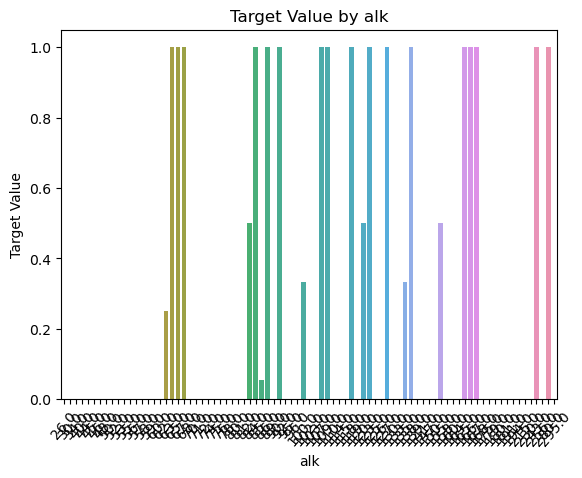

In [1539]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f'Target Value by {col}')
plt.xlabel(f'{col}')
plt.ylabel('Target Value')
plt.xticks(rotation=50)
plt.show()


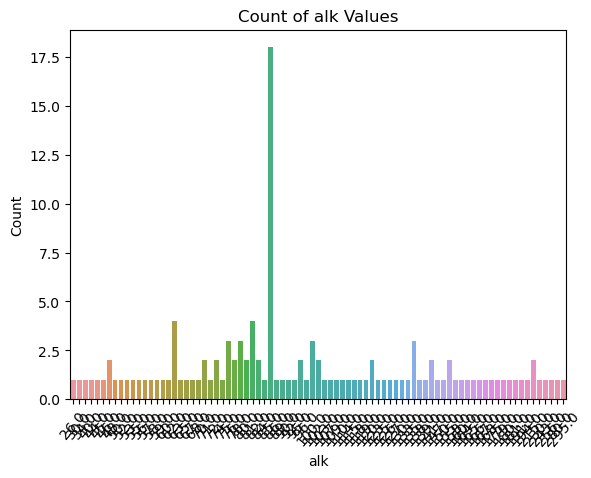

In [1540]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


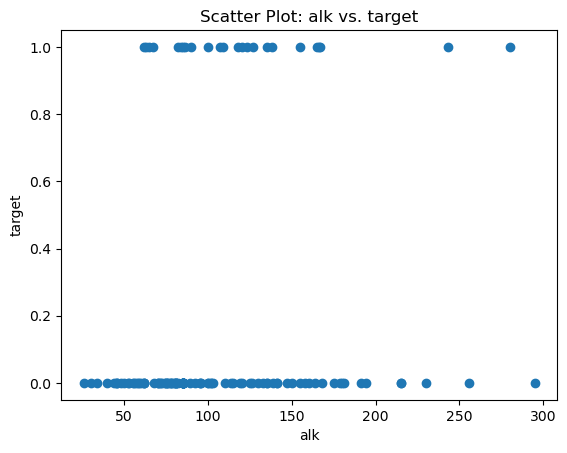

In [1541]:
# scatter plot vs target
plt.scatter(df[col], df['target'])
plt.xlabel(f'{col}')
plt.ylabel('target')
plt.title(f'Scatter Plot: {col} vs. target')
plt.show()

## sgot

In [1542]:
col = 'sgot'

In [1543]:
df[col].value_counts()

20     7
60     6
28     5
30     5
55     5
      ..
249    1
224    1
156    1
86     1
54     1
Name: sgot, Length: 84, dtype: int64

In [1544]:
df[col].describe()

count     151
unique     84
top        20
freq        7
Name: sgot, dtype: object

In [1545]:
df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)


In [1546]:
df[col].head()

0     18.0
1     42.0
2     32.0
3     52.0
4    200.0
Name: sgot, dtype: float64

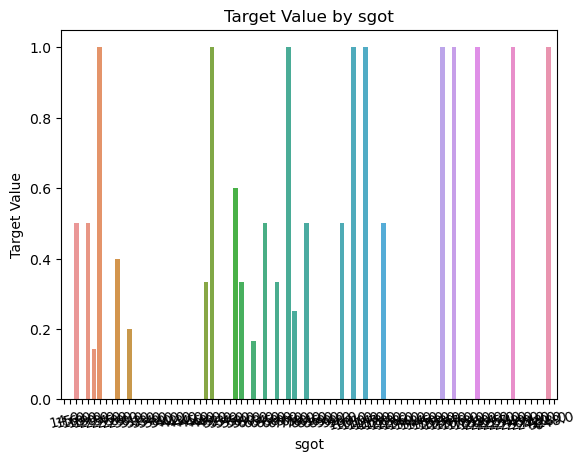

In [1547]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f'Target Value by {col}')
plt.xlabel(f'{col}')
plt.ylabel('Target Value')
plt.xticks(rotation=14)
plt.show()


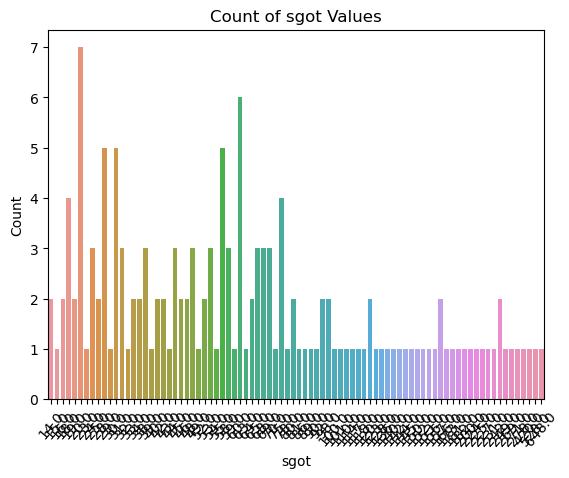

In [1548]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


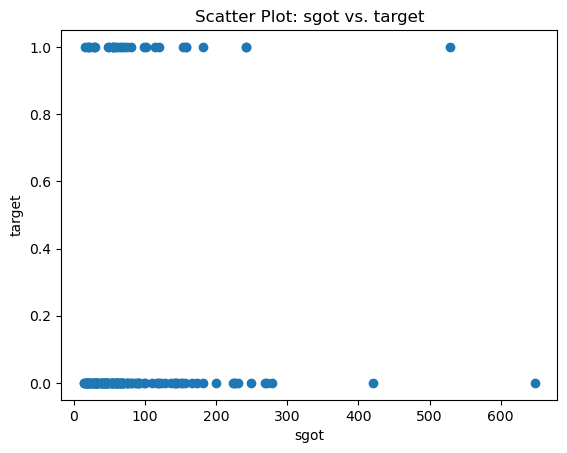

In [1549]:
# scatter plot vs target
plt.scatter(df[col], df['target'])
plt.xlabel(f'{col}')
plt.ylabel('target')
plt.title(f'Scatter Plot: {col} vs. target')
plt.show()

## albu

In [1550]:
col = 'albu'

In [1551]:
df[col].value_counts()


4      25
4.2    13
4.4     9
3.8     9
3.9     8
4.1     8
4.3     7
3.3     6
3.5     6
3       5
2.9     5
3.4     4
4.5     4
2.6     3
3.1     3
2.7     3
3.7     3
2.8     3
4.6     2
3.6     2
2.4     2
4.9     2
6.4     1
2.1     1
5       1
4.8     1
5.3     1
4.7     1
2.2     1
Name: albu, dtype: int64

In [1552]:
df[col].describe()

count     139
unique     29
top         4
freq       25
Name: albu, dtype: object

In [1553]:
df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)


In [1554]:
df[col].head()

0    4.0
1    3.5
2    4.0
3    4.0
4    4.0
Name: albu, dtype: float64

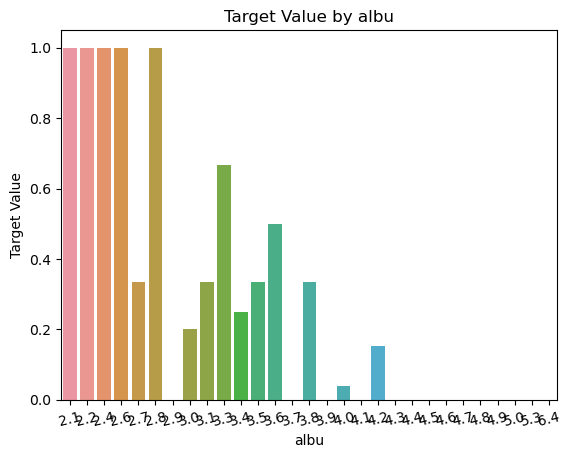

In [1555]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f'Target Value by {col}')
plt.xlabel(f'{col}')
plt.ylabel('Target Value')
plt.xticks(rotation=14)
plt.show()


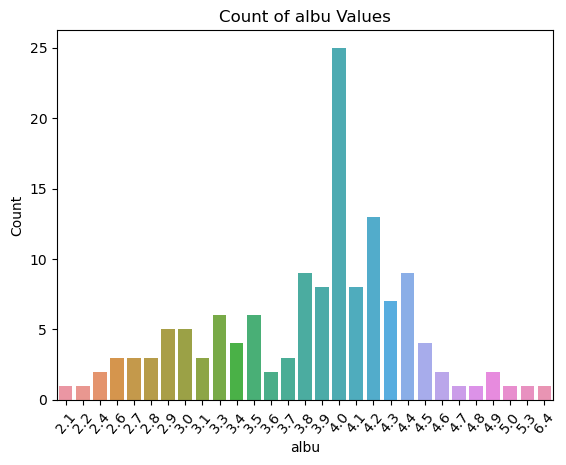

In [1556]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


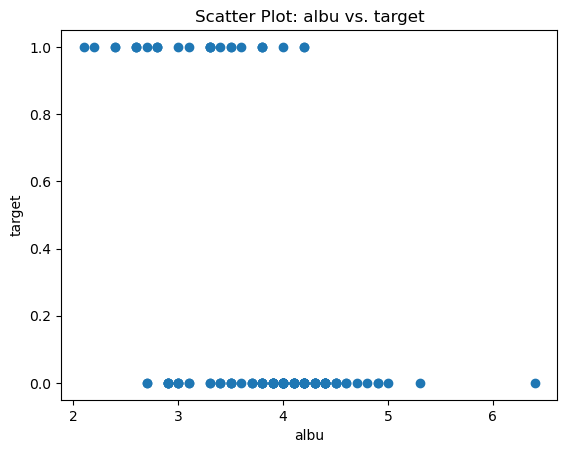

In [1557]:
# scatter plot vs target
plt.scatter(df[col], df['target'])
plt.xlabel(f'{col}')
plt.ylabel('target')
plt.title(f'Scatter Plot: {col} vs. target')
plt.show()

## protime

In [1558]:
col = 'protime'

In [1559]:
df[col].value_counts()

100    11
74      4
85      4
46      4
66      4
54      3
52      3
31      3
57      3
41      3
90      3
29      2
56      2
73      2
60      2
67      2
70      2
50      2
35      2
62      2
63      2
38      1
0       1
32      1
72      1
23      1
43      1
51      1
48      1
30      1
80      1
84      1
58      1
76      1
75      1
77      1
21      1
40      1
36      1
47      1
39      1
64      1
78      1
42      1
Name: protime, dtype: int64

In [1560]:
df[col].describe()

count      88
unique     44
top       100
freq       11
Name: protime, dtype: object

In [1561]:
df[col] = pd.to_numeric(df[col], errors='coerce')
# df[col] = (df[col] == 2.0).astype(int)


In [1562]:
df[col].head()

0     NaN
1     NaN
2     NaN
3    80.0
4     NaN
Name: protime, dtype: float64

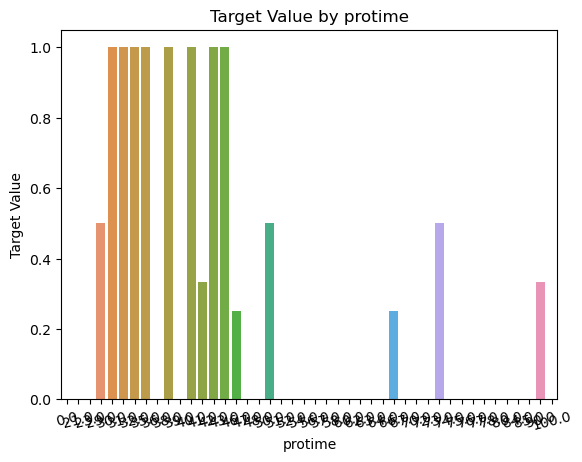

In [1563]:
sns.barplot(x=col, y='target', data=df, ci=None)
plt.title(f'Target Value by {col}')
plt.xlabel(f'{col}')
plt.ylabel('Target Value')
plt.xticks(rotation=14)
plt.show()


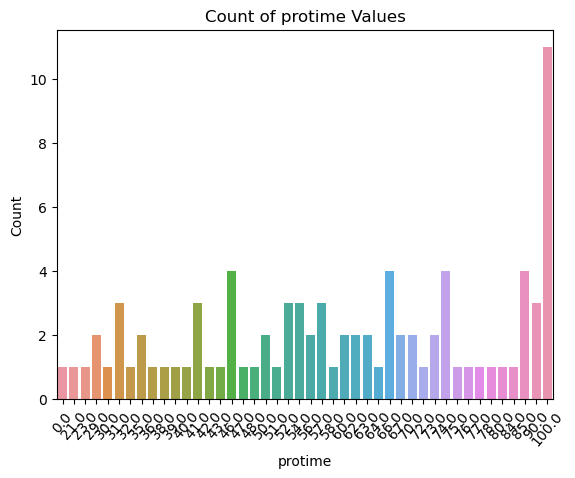

In [1564]:
sns.countplot(x=col, data=df)
plt.title(f'Count of {col} Values')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()


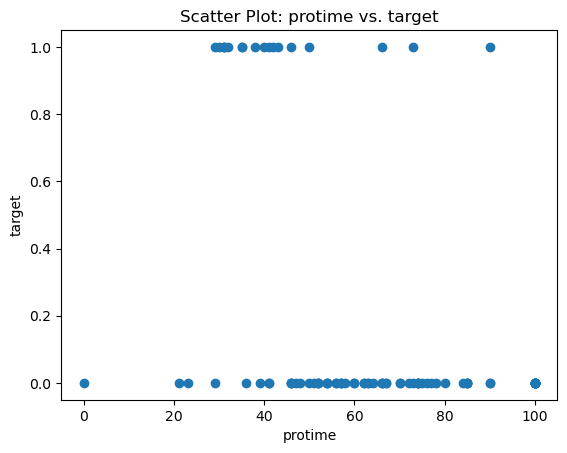

In [1565]:
# scatter plot vs target
plt.scatter(df[col], df['target'])
plt.xlabel(f'{col}')
plt.ylabel('target')
plt.title(f'Scatter Plot: {col} vs. target')
plt.show()

In [1566]:

df.describe(include='all')

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,0.206452,41.200000,0.896774,1.506494,0.845161,0.649351,0.396104,0.207792,0.827586,0.416667,0.20000,1.660000,0.133333,0.12000,1.427517,105.325397,85.89404,3.817266,61.852273,0.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.300000,26.000000,14.00000,2.100000,0.000000,0.000000
25%,0.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.700000,74.250000,31.50000,3.400000,46.000000,0.000000
50%,0.000000,39.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,2.000000,0.000000,0.00000,1.000000,85.000000,58.00000,4.000000,61.000000,0.000000
75%,0.000000,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,2.000000,0.000000,0.00000,1.500000,132.250000,100.50000,4.200000,76.250000,1.000000
max,1.000000,78.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.00000,8.000000,295.000000,648.00000,6.400000,100.000000,1.000000


In [1567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      155 non-null    int64  
 1   age         155 non-null    int64  
 2   gender      155 non-null    int64  
 3   steroid     154 non-null    float64
 4   antivirals  155 non-null    int64  
 5   fatigue     154 non-null    float64
 6   malaise     154 non-null    float64
 7   anorexia    154 non-null    float64
 8   liverBig    145 non-null    float64
 9   liverFirm   144 non-null    float64
 10  spleen      150 non-null    float64
 11  spiders     150 non-null    float64
 12  ascites     150 non-null    float64
 13  varices     150 non-null    float64
 14  bili        149 non-null    float64
 15  alk         126 non-null    float64
 16  sgot        151 non-null    float64
 17  albu        139 non-null    float64
 18  protime     88 non-null     float64
 19  histology   155 non-null    i

In [1568]:
df.shape

(155, 20)

## Handle Null-values

In [1569]:
#The Number Of Null-values In Columns
nan_columns = df.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print(nan_columns)

steroid       1
fatigue       1
malaise       1
anorexia      1
liverBig     10
liverFirm    11
spleen        5
spiders       5
ascites       5
varices       5
bili          6
alk          29
sgot          4
albu         16
protime      67
dtype: int64


In [1570]:
# dffg

### Handling Missing Values for Categorical Features

We use **mode** for the following features:

- `steroid`
- `fatigue`
- `malaise`
- `anorexia`
- `spleen`
- `spiders`
- `ascites`
- `varices`
- `liverBig`
- `liverFirm`

#### ✅ Why mode?
- These features have **very few missing values** (only 1).
- Many of them are **binary (0/1)**, where mode imputation is both reasonable and effective.


In [1571]:
categorical_columns = ['steroid', 'fatigue', 'malaise', 'anorexia', 'spleen', 'spiders', 'ascites', 'varices', 'liverBig', 'liverFirm']
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

### Imputing Missing Values for Numeric Features

We analyzed the **skewness** of the following numeric columns to decide between **mean** and **median** :

- `bili`
- `alk`
- `sgot`
- `albu`
- `protime`

### 📊 Strategy:
- If **|skewness| < 0.5**, the distribution is approximately symmetric → use **mean**
- Otherwise (skewed distribution) → use **median**

This approach helps us minimize the distortion of central tendency due to outliers in skewed features.

In [1572]:

numeric_columns = ['bili', 'alk', 'sgot', 'albu', 'protime']
for col in numeric_columns:
    skewness = df[col].skew()
    print(f"\n{col}:")
    print(f"Skewness: {skewness}")
    if abs(skewness) < 0.5:
        print("Use mean")
    else:
        print("Use median")


bili:
Skewness: 2.8919124677065873
Use median

alk:
Skewness: 1.355307355757784
Use median

sgot:
Skewness: 3.1785663703755835
Use median

albu:
Skewness: -0.12199551020140091
Use mean

protime:
Skewness: 0.022382350709543853
Use mean


In [1573]:
for col in ['bili', 'alk', 'sgot']:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

for col in ['albu', 'protime']:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)


In [1574]:
# Check number of null value after make clean it
nan_columns = df.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

print(nan_columns)

Series([], dtype: int64)


## Check Duplicate Values

In [1575]:
Number_of_Duplicated_rows= df.duplicated().sum()
print(f"number of duplicated rows: {Number_of_Duplicated_rows} ")

number of duplicated rows: 0 


In [1576]:
for column in df.columns:
    value_count = df[[column]].value_counts()
    print(f"\n=== Value counts for {column} ===")
    print(value_count.head())
    print(f"Total number of unique values: {len(value_count)}")
    print("-" * 50)


=== Value counts for target ===
target
0         123
1          32
dtype: int64
Total number of unique values: 2
--------------------------------------------------

=== Value counts for age ===
age
38     8
30     8
34     8
36     7
50     6
dtype: int64
Total number of unique values: 49
--------------------------------------------------

=== Value counts for gender ===
gender
1         139
0          16
dtype: int64
Total number of unique values: 2
--------------------------------------------------

=== Value counts for steroid ===
steroid
2.0        79
1.0        76
dtype: int64
Total number of unique values: 2
--------------------------------------------------

=== Value counts for antivirals ===
antivirals
1             131
0              24
dtype: int64
Total number of unique values: 2
--------------------------------------------------

=== Value counts for fatigue ===
fatigue
1.0        101
0.0         54
dtype: int64
Total number of unique values: 2
---------------------------

## Handle IQR for Outlier Data

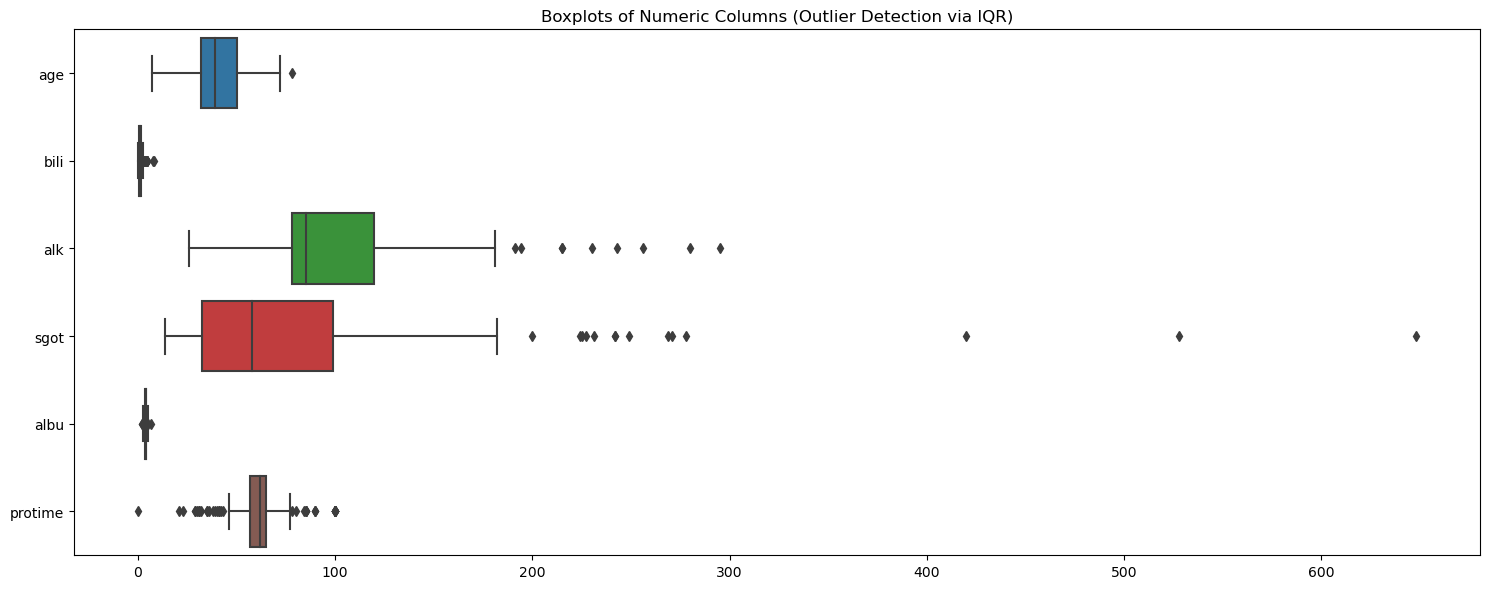

In [1577]:
numeric_df = df.select_dtypes(include=['number'])
non_binary_cols = [col for col in numeric_df.columns if numeric_df[col].nunique() > 2]

plt.figure(figsize=(15, 6))
sns.boxplot(data=numeric_df[non_binary_cols], orient="h")
plt.title("Boxplots of Numeric Columns (Outlier Detection via IQR)")
plt.tight_layout()
plt.show()

In [1578]:
non_binary_cols = [col for col in numeric_df.columns if numeric_df[col].nunique() > 2]
print("Non-binary columns for outlier detection:", non_binary_cols)

Non-binary columns for outlier detection: ['age', 'bili', 'alk', 'sgot', 'albu', 'protime']


In [1579]:
for col in non_binary_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f'Number of outliers for column {col}: ', len(outliers))
    print('col: ', outliers[col])


Number of outliers for column age:  1
col:  2    78
Name: age, dtype: int64
Number of outliers for column bili:  17
col:  41     4.6
62     3.5
67     4.1
71     2.8
91     4.6
97     3.0
100    4.8
103    4.6
115    3.2
119    3.2
120    2.9
127    2.8
129    4.6
131    8.0
141    3.9
146    4.2
150    7.6
Name: bili, dtype: float64
Number of outliers for column alk:  9
col:  30     280.0
36     194.0
47     191.0
62     215.0
90     230.0
103    215.0
110    256.0
134    243.0
140    295.0
Name: alk, dtype: float64
Number of outliers for column sgot:  14
col:  4      200.0
11     249.0
47     420.0
72     271.0
76     242.0
81     224.0
102    227.0
103    269.0
107    648.0
108    225.0
123    231.0
132    278.0
147    528.0
150    242.0
Name: sgot, dtype: float64
Number of outliers for column albu:  6
col:  74     5.3
104    2.1
105    6.4
127    2.4
131    2.2
144    2.4
Name: albu, dtype: float64
Number of outliers for column protime:  42
col:  3       80.0
10      85.0
13      7

# Spilit Dataset

In [1580]:
df_cleaned.head(10)

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,0,30,0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,85.0,18.0,4.000000,61.852273,0
1,0,50,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.9,135.0,42.0,3.500000,61.852273,0
2,0,78,1,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.7,96.0,32.0,4.000000,61.852273,0
4,0,34,1,2.0,1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,85.0,200.0,4.000000,61.852273,0
5,0,34,1,2.0,1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.9,95.0,28.0,4.000000,75.000000,0
6,1,51,1,1.0,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,85.0,58.0,3.817266,61.852273,0
7,0,23,1,2.0,1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,85.0,58.0,3.817266,61.852273,0
8,0,39,1,2.0,1,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.7,85.0,48.0,4.400000,61.852273,0
9,0,30,1,2.0,1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,85.0,120.0,3.900000,61.852273,0
11,0,32,1,2.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,59.0,249.0,3.700000,54.000000,0


In [1581]:
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardization

In [1582]:
X_train[non_binary_cols].describe()

,age,bili,alk,sgot,albu,protime
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,41.582278,1.564557,96.164557,97.506329,3.920344,61.570339
std,13.633112,1.435005,40.878315,100.356528,0.611529,6.416567
min,7.000000,0.300000,34.000000,14.000000,2.200000,46.000000
25%,30.500000,0.800000,79.000000,38.000000,3.700000,61.852273
50%,40.000000,1.000000,85.000000,60.000000,4.000000,61.852273
75%,51.000000,1.550000,101.000000,120.000000,4.250000,61.852273
max,72.000000,8.000000,256.000000,648.000000,6.400000,77.000000


In [1583]:

# numeric_columns = ['age', 'bili', 'alk', 'sgot', 'albu', 'protime']

scaler = StandardScaler()
X_train[non_binary_cols] = scaler.fit_transform(X_train[non_binary_cols])


In [1584]:
X_train[non_binary_cols].describe()

,age,bili,alk,sgot,albu,protime
count,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01
mean,4.637640e-17,8.528691e-17,5.480848e-17,-1.493180e-18,1.815707e-15,-2.961942e-15
std,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00,1.006390e+00
min,-2.552847e+00,-8.868519e-01,-1.530439e+00,-8.374136e-01,-2.831163e+00,-2.442090e+00
25%,-8.180885e-01,-5.361947e-01,-4.225770e-01,-5.967381e-01,-3.626195e-01,4.421909e-02
50%,-1.168030e-01,-3.959319e-01,-2.748620e-01,-3.761189e-01,1.310891e-01,4.421909e-02
75%,6.952117e-01,-1.020901e-02,1.190446e-01,2.255698e-01,5.425130e-01,4.421909e-02
max,2.245422e+00,4.513268e+00,3.935015e+00,5.520431e+00,4.080758e+00,2.420025e+00


# Heat Map

In [1585]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 153
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      113 non-null    int64  
 1   age         113 non-null    int64  
 2   gender      113 non-null    int64  
 3   steroid     113 non-null    float64
 4   antivirals  113 non-null    int64  
 5   fatigue     113 non-null    float64
 6   malaise     113 non-null    float64
 7   anorexia    113 non-null    float64
 8   liverBig    113 non-null    float64
 9   liverFirm   113 non-null    float64
 10  spleen      113 non-null    float64
 11  spiders     113 non-null    float64
 12  ascites     113 non-null    float64
 13  varices     113 non-null    float64
 14  bili        113 non-null    float64
 15  alk         113 non-null    float64
 16  sgot        113 non-null    float64
 17  albu        113 non-null    float64
 18  protime     113 non-null    float64
 19  histology   113 non-null    i

In [1586]:
df_cleaned.shape

(113, 20)

In [1587]:
df.shape

(155, 20)

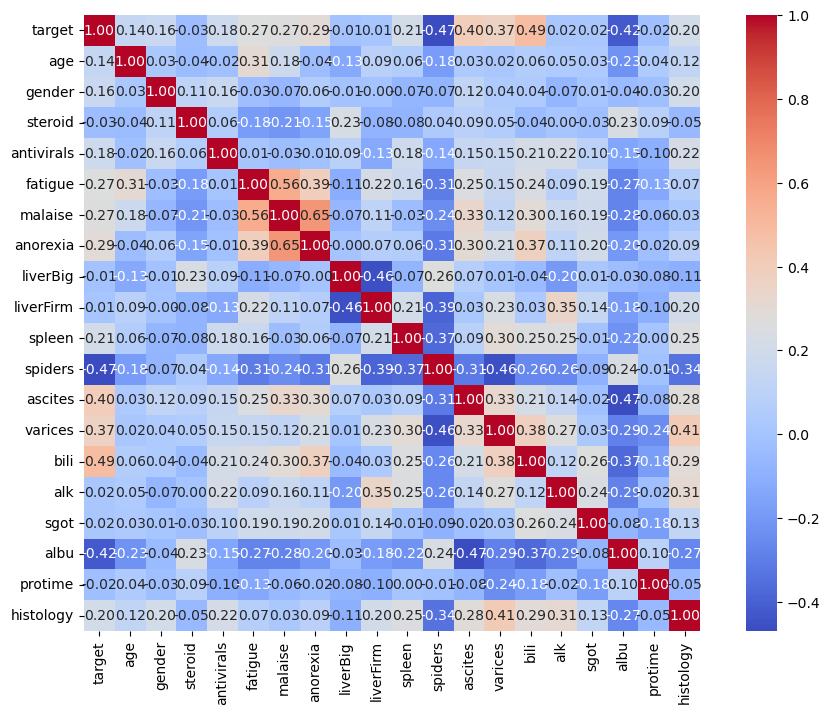

In [1588]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [1589]:
high_corr_pairs = np.where((abs(correlation_matrix) > 0.85) & (abs(correlation_matrix) < 1))
for i, j in zip(*high_corr_pairs):
    print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]} : {correlation_matrix.iat[i, j]:.2f}")


# Stratified 5-Fold Cross Validation

In [1592]:
threshold = 0.3

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    smt = SMOTETomek(random_state=42)
    X_tr_bal, y_tr_bal = smt.fit_resample(X_tr, y_tr)

    print(f"\n--- Fold {fold + 1} ---")
    for name, model in models.items():
        model.fit(X_tr_bal, y_tr_bal)

        # پیش‌بینی بر اساس آستانه دلخواه
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_val)[:, 1]
        else:
            y_proba = model.decision_function(X_val)

        y_pred = (y_proba >= threshold).astype(int)

        auc = roc_auc_score(y_val, y_proba)
        acc = accuracy_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, zero_division=0)
        f1 = f1_score(y_val, y_pred)
        cm = confusion_matrix(y_val, y_pred)

        results[name]['Accuracy'].append(acc)
        results[name]['Recall'].append(rec)
        results[name]['Precision'].append(prec)
        results[name]['F1 Score'].append(f1)
        results[name]['ROC AUC'].append(auc)
        results[name]['Confusion Matrix'].append(cm)

        print(f"{name} - Acc: {acc:.4f}, Recall: {rec:.4f}, Precision: {prec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")



--- Fold 1 ---
RandomForest - Acc: 0.7500, Recall: 0.5000, Precision: 0.2500, F1: 0.3333, AUC: 0.8214
Confusion Matrix:
[[11  3]
 [ 1  1]]
SVM - Acc: 0.7500, Recall: 0.5000, Precision: 0.2500, F1: 0.3333, AUC: 0.7857
Confusion Matrix:
[[11  3]
 [ 1  1]]
MLP - Acc: 0.8125, Recall: 0.0000, Precision: 0.0000, F1: 0.0000, AUC: 0.8571
Confusion Matrix:
[[13  1]
 [ 2  0]]

--- Fold 2 ---
RandomForest - Acc: 0.6250, Recall: 1.0000, Precision: 0.3333, F1: 0.5000, AUC: 0.9744
Confusion Matrix:
[[7 6]
 [0 3]]
SVM - Acc: 0.1875, Recall: 1.0000, Precision: 0.1875, F1: 0.3158, AUC: 0.9231
Confusion Matrix:
[[ 0 13]
 [ 0  3]]
MLP - Acc: 0.8125, Recall: 0.6667, Precision: 0.5000, F1: 0.5714, AUC: 0.8718
Confusion Matrix:
[[11  2]
 [ 1  2]]

--- Fold 3 ---
RandomForest - Acc: 0.8125, Recall: 1.0000, Precision: 0.5000, F1: 0.6667, AUC: 0.9487
Confusion Matrix:
[[10  3]
 [ 0  3]]
SVM - Acc: 0.4375, Recall: 1.0000, Precision: 0.2500, F1: 0.4000, AUC: 0.8718
Confusion Matrix:
[[4 9]
 [0 3]]
MLP - Acc: 0.

In [1598]:
results_df

,Model,Mean Accuracy,Mean Recall,Mean Precision,Mean F1 Score,Mean ROC AUC
0,RandomForest,0.834167,0.433333,0.483333,0.414286,0.869963
1,SVM,0.885833,0.366667,0.500000,0.420000,0.880220
2,MLP,0.822500,0.533333,0.413333,0.441905,0.822711


# Learning Curve

/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344

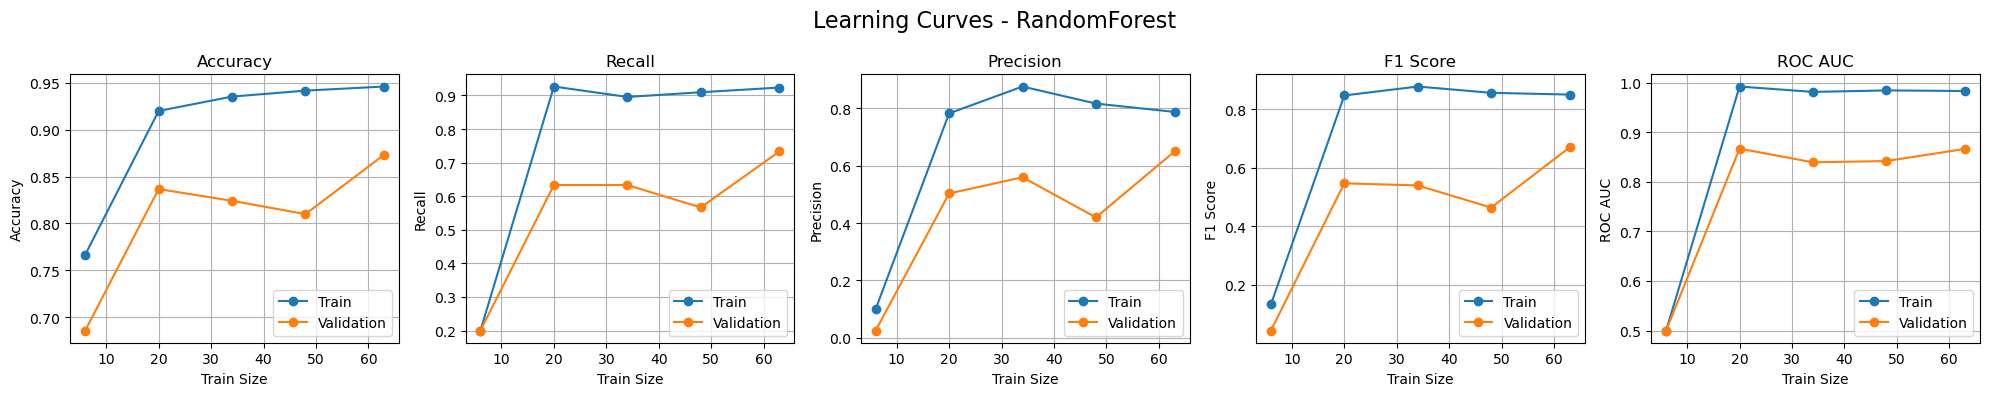

/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344

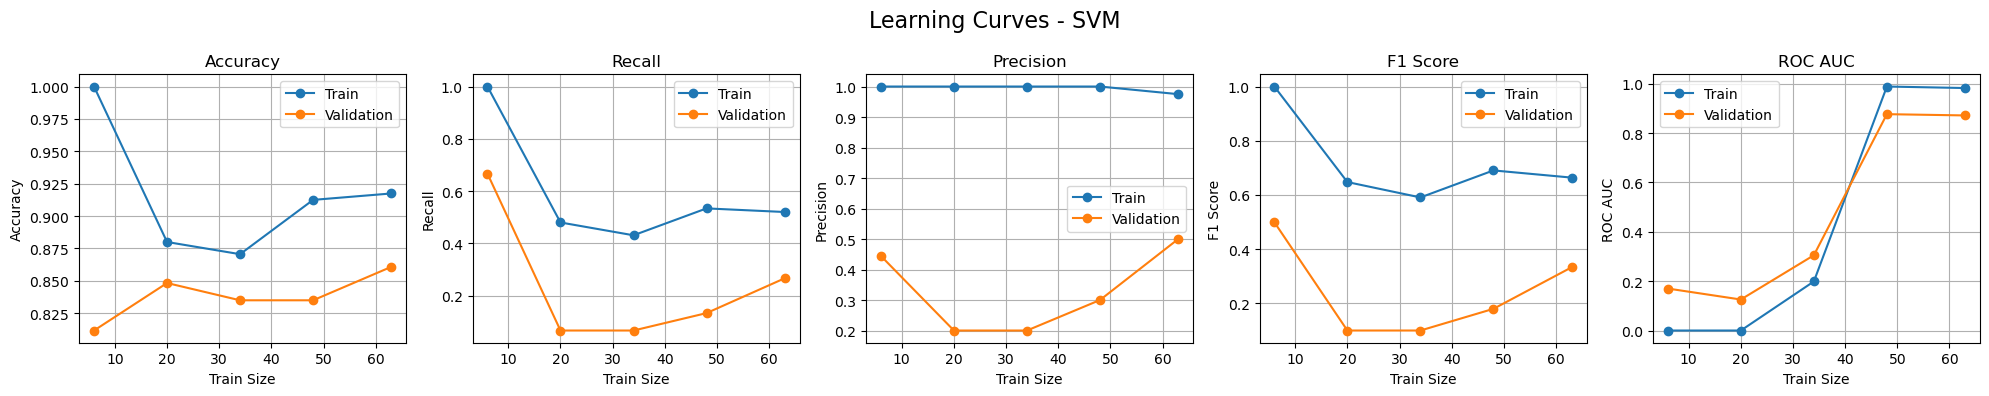

/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faezeh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344

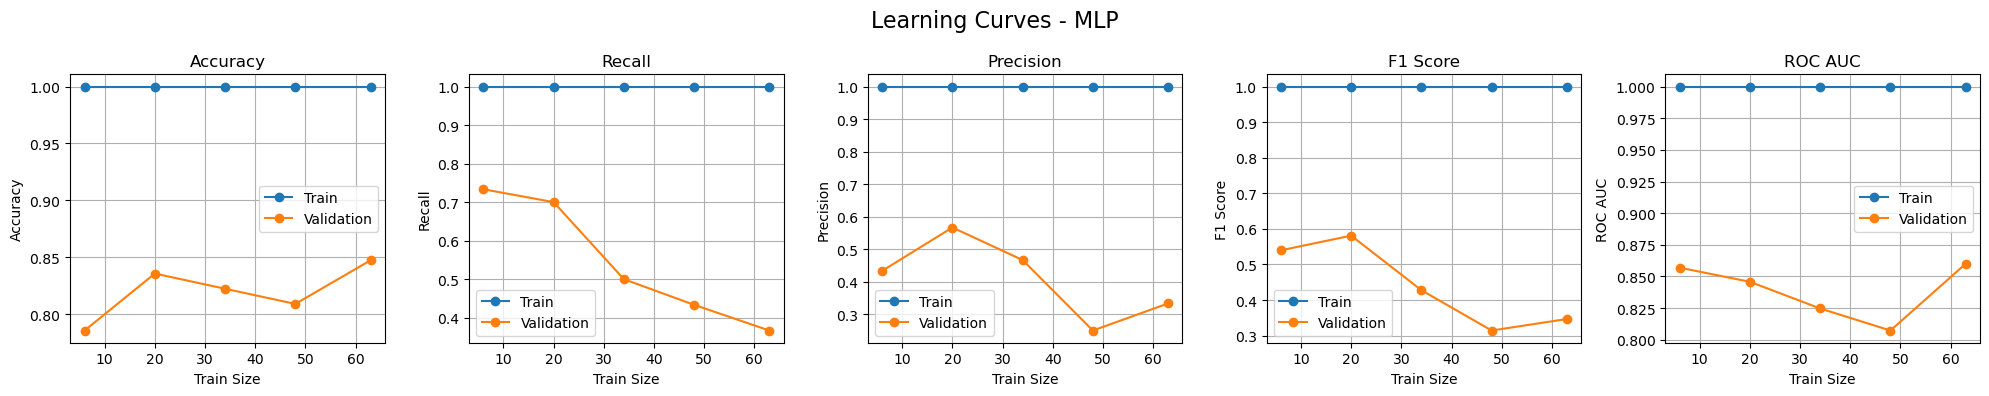

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np

#  Best models with tuned hyperparameters
models = {
    'RandomForest': Pipeline([
        ('clf', RandomForestClassifier(
            max_depth=None,
            max_features='sqrt',
            min_samples_leaf=4,
            min_samples_split=2,
            n_estimators=100,
            class_weight='balanced',
            random_state=42
        ))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(
            C=0.1,
            gamma='auto',
            kernel='poly',
            probability=True,
            class_weight='balanced',
            random_state=42
        ))
    ]),
    'MLP': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(
            hidden_layer_sizes=(128,),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            learning_rate_init=0.001,
            max_iter=1000,
            random_state=42
        ))
    ])
}

scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall': make_scorer(recall_score, pos_label=1),
    'Precision': make_scorer(precision_score, pos_label=1),
    'F1 Score': make_scorer(f1_score, pos_label=1),
    'ROC AUC': make_scorer(roc_auc_score, needs_proba=True)
}

# 📈 Train sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 5)

# 📊 Plot learning curves for each model and metric
for model_name, model in models.items():
    fig, axes = plt.subplots(1, len(scorers), figsize=(20, 4))
    fig.suptitle(f'Learning Curves - {model_name}', fontsize=16)
    
    if len(scorers) == 1:
        axes = [axes]

    for i, (metric_name, scorer) in enumerate(scorers.items()):
        train_sizes_out, train_scores, val_scores = learning_curve(
            estimator=model,
            X=X_train,
            y=y_train,
            cv=5,
            scoring=scorer,
            train_sizes=train_sizes,
            n_jobs=-1
        )
        
        train_mean = train_scores.mean(axis=1)
        val_mean = val_scores.mean(axis=1)

        axes[i].plot(train_sizes_out, train_mean, 'o-', label='Train')
        axes[i].plot(train_sizes_out, val_mean, 'o-', label='Validation')
        axes[i].set_title(metric_name)
        axes[i].set_xlabel('Train Size')
        axes[i].set_ylabel(metric_name)
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


# RFC & MLP & SVM Alghorithms

In [1594]:
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

threshold = 0.3

models = {
    'RandomForest': ImbPipeline([
        ('resample', SMOTETomek(random_state=42)),
        ('clf', RandomForestClassifier(
            max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=100))
    ]),
    'SVM': ImbPipeline([
        ('resample', SMOTETomek(random_state=42)),
        ('clf', SVC(C=0.1, gamma='auto', kernel='poly', probability=True, random_state=42))
    ]),
    'MLP': ImbPipeline([
        ('resample', SMOTETomek(random_state=42)),
        ('clf', MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam',
                              alpha=0.0001, learning_rate_init=0.001, max_iter=1000, random_state=42))
    ])
}

print("\nFinal Evaluation on Test Set\n" + "="*40)

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")



Final Evaluation on Test Set

Model: RandomForest
Accuracy: 0.5588
Recall: 1.0000
Precision: 0.2500
F1 Score: 0.4000
AUC: 0.8000
Confusion Matrix:
[[14 15]
 [ 0  5]]

Model: SVM
Accuracy: 0.3824
Recall: 0.4000
Precision: 0.1000
F1 Score: 0.1600
AUC: 0.3966
Confusion Matrix:
[[11 18]
 [ 3  2]]

Model: MLP
Accuracy: 0.8529
Recall: 0.0000
Precision: 0.0000
F1 Score: 0.0000
AUC: 0.5034
Confusion Matrix:
[[29  0]
 [ 5  0]]


# Best hyper paramas

## Find best hyper params for svm

In [1595]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, f1_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.01, 0.001],
    'svc__kernel': ['rbf', 'poly']
}

pipeline = ImbPipeline([
    ('smt', SMOTETomek(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])

# scorer = make_scorer(f1_score)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(recall_score, pos_label=0)

grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.2s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.2s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.2s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.2s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.1, svc__gamma=scale, svc__kernel=poly; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=auto, sv

## Find best hyper params for mlp

In [1596]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}
scoring = make_scorer(recall_score, pos_label=0)

mlp = MLPClassifier(random_state=42)
grid = GridSearchCV(mlp, param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best recall_score:", grid.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
Best recall_score: 0.9384615384615385


## FInd best hyper params for rf

In [1597]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}
scoring = make_scorer(recall_score, pos_label=0)
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring=scoring, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best recall_score :", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=None,